## Polynomial Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('./data/usitc/tradeVariables-mxcan.csv')
dataset.shape

(24, 5)

In [3]:
dataset.head()

,year,exports,imports,travel_mx,travel_can
0,1996,5.468587e+10,7.296319e+10,276751448,153038903
1,1997,6.839322e+10,8.587234e+10,348661488,145512710
2,1998,7.536930e+10,9.470867e+10,366296614,142291790
3,1999,8.138074e+10,1.100000e+11,391959396,146497328
4,2000,1.000000e+11,1.360000e+11,392231869,147789673


In [6]:
# Matrix of independent variables should include imports
# Vector of dependent variables should include travel_mx
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 3].values

In [8]:
print(X)
print(y)

[[7.29631894e+10]
 [8.58723447e+10]
 [9.47086660e+10]
 [1.10000000e+11]
 [1.36000000e+11]
 [1.31000000e+11]
 [1.35000000e+11]
 [1.38000000e+11]
 [1.56000000e+11]
 [1.70000000e+11]
 [1.98000000e+11]
 [2.11000000e+11]
 [2.16000000e+11]
 [1.77000000e+11]
 [2.30000000e+11]
 [2.63000000e+11]
 [2.78000000e+11]
 [2.81000000e+11]
 [2.96000000e+11]
 [2.96000000e+11]
 [2.94000000e+11]
 [3.13000000e+11]
 [3.46000000e+11]
 [3.58000000e+11]]
[276751448 348661488 366296614 391959396 392231869 362991511 352870123
 343654239 343524676 336990567 327588026 310095754 295921230 264450245
 242776894 225541089 232999664 243982227 254746277 267663436 273532405
 278703002 283743197 275538145]


In [9]:
## Split the dataset into the training set and the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [10]:
# Fitting linear regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# Fitting polynomial regression to the dataset
# Note the new class that will be imported
from sklearn.preprocessing import PolynomialFeatures

# New matrix of features, x poly, and x^2 - x^n
# It will transform x into a new matrix
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X)

# Create a new linear regression object
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Visualization

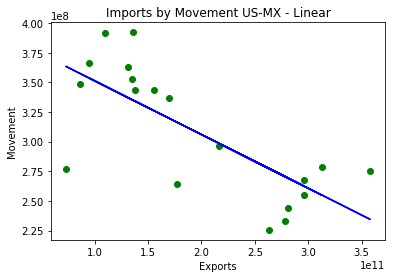

In [13]:
# Visualizing the linear regression results
plt.scatter(X_train, y_train, color="green")
plt.plot(X_train, lin_reg.predict(X_train), color="blue")
plt.title("Imports by Movement US-MX - Linear")
plt.xlabel("Imports")
plt.ylabel("Movement")
plt.show()

#Insight: linear regression doesn't work well here

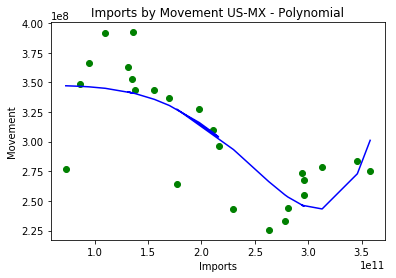

In [32]:
# Visualizing the Polynomial Regression Results
plt.scatter(X, y, color="green")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
plt.title("Imports by Movement US-MX - Polynomial")
plt.xlabel("Imports")
plt.ylabel("Movement")
plt.show()

## Extracting the datapoints

array([[7.29631894e+10, 3.47088645e+08],
       [8.58723447e+10, 3.46662229e+08],
       [9.47086660e+10, 3.46200719e+08],
       [1.10000000e+11, 3.44949478e+08],
       [1.36000000e+11, 3.40935414e+08],
       [1.31000000e+11, 3.41934191e+08],
       [1.35000000e+11, 3.41144930e+08],
       [1.38000000e+11, 3.40501276e+08],
       [1.56000000e+11, 3.35608407e+08],
       [1.70000000e+11, 3.30432687e+08],
       [1.98000000e+11, 3.16046581e+08],
       [2.11000000e+11, 3.07528799e+08],
       [2.16000000e+11, 3.03969150e+08],
       [1.77000000e+11, 3.27351630e+08],
       [2.30000000e+11, 2.93295578e+08],
       [2.63000000e+11, 2.66313233e+08],
       [2.78000000e+11, 2.55218376e+08],
       [2.81000000e+11, 2.53264394e+08],
       [2.96000000e+11, 2.45599989e+08],
       [2.96000000e+11, 2.45599989e+08],
       [2.94000000e+11, 2.46377548e+08],
       [3.13000000e+11, 2.43219827e+08],
       [3.46000000e+11, 2.72893179e+08],
       [3.58000000e+11, 3.01077272e+08]])

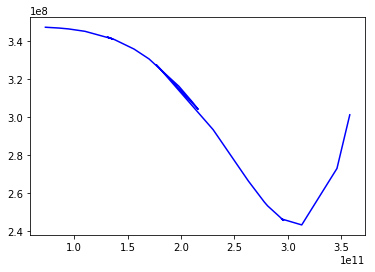

In [33]:
# Regression
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color="blue")
ax = plt.gca() # get axis handle
line = ax.lines[0] # get the first line, there might be more

line.get_xydata()

In [34]:
print(X)

[[7.29631894e+10]
 [8.58723447e+10]
 [9.47086660e+10]
 [1.10000000e+11]
 [1.36000000e+11]
 [1.31000000e+11]
 [1.35000000e+11]
 [1.38000000e+11]
 [1.56000000e+11]
 [1.70000000e+11]
 [1.98000000e+11]
 [2.11000000e+11]
 [2.16000000e+11]
 [1.77000000e+11]
 [2.30000000e+11]
 [2.63000000e+11]
 [2.78000000e+11]
 [2.81000000e+11]
 [2.96000000e+11]
 [2.96000000e+11]
 [2.94000000e+11]
 [3.13000000e+11]
 [3.46000000e+11]
 [3.58000000e+11]]


In [35]:
print(y)

[276751448 348661488 366296614 391959396 392231869 362991511 352870123
 343654239 343524676 336990567 327588026 310095754 295921230 264450245
 242776894 225541089 232999664 243982227 254746277 267663436 273532405
 278703002 283743197 275538145]


In [36]:
y_coor = y
print(y_coor)

[276751448 348661488 366296614 391959396 392231869 362991511 352870123
 343654239 343524676 336990567 327588026 310095754 295921230 264450245
 242776894 225541089 232999664 243982227 254746277 267663436 273532405
 278703002 283743197 275538145]


In [37]:
for y in y_coor:
    print(y)

276751448
348661488
366296614
391959396
392231869
362991511
352870123
343654239
343524676
336990567
327588026
310095754
295921230
264450245
242776894
225541089
232999664
243982227
254746277
267663436
273532405
278703002
283743197
275538145
